## Libraries

In [1]:
# Data
import ast
import pandas as pd
import numpy as np
from typing import Dict
# ML
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Load the Data

In [6]:
import pandas as pd
import numpy as np
import math
import json

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [7]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [8]:
print(f"Number of rows: {len(portfolio)}")

Number of rows: 10


In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
print(f"Number of rows: {len(profile)}")

Number of rows: 17000


In [11]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [12]:
print(f"Number of rows: {len(transcript)}")

Number of rows: 306534


## Exploration Data Analysis

### Portfolio

#### Qualitative Analysis

In [13]:
new_portfolio = convert_list_to_string(portfolio, "channels")

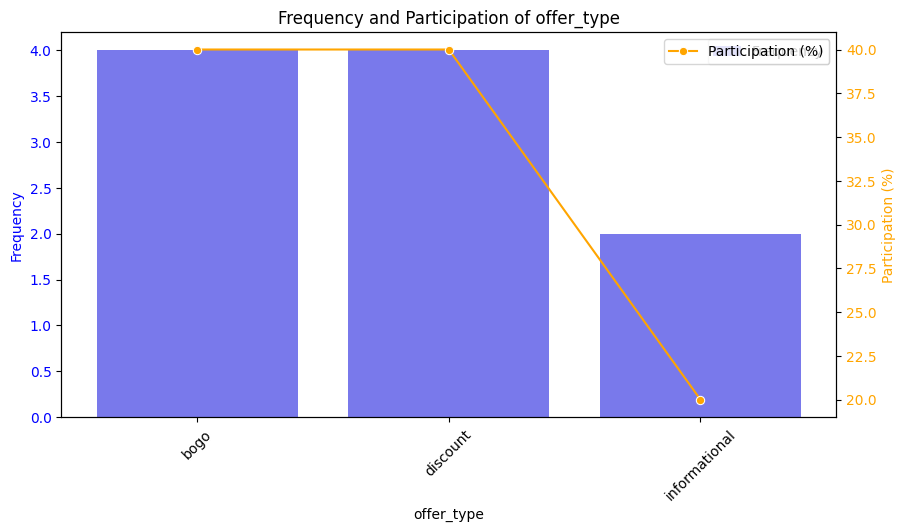

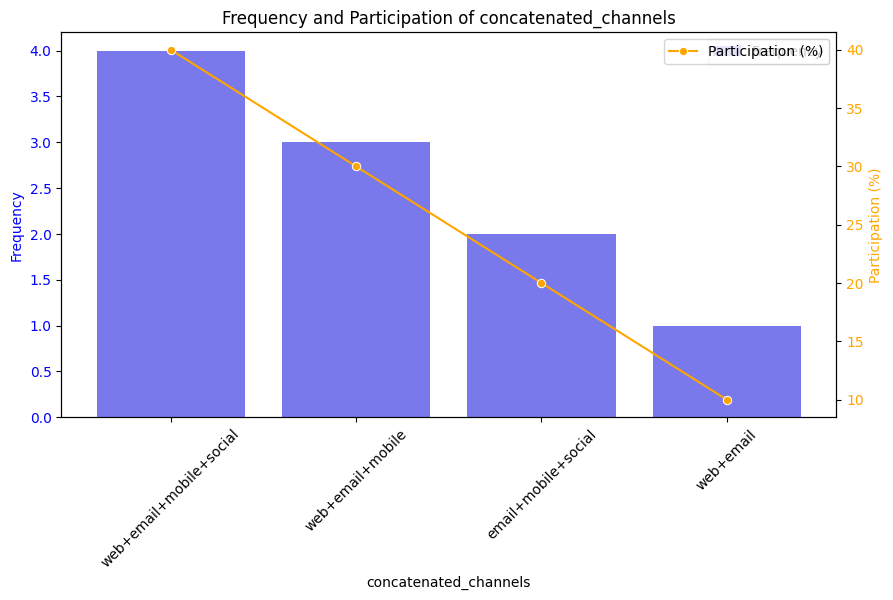

In [14]:
explore_qualitative_variables(new_portfolio, ["offer_type","concatenated_channels"])

#### Quantitative Analysis

       difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000


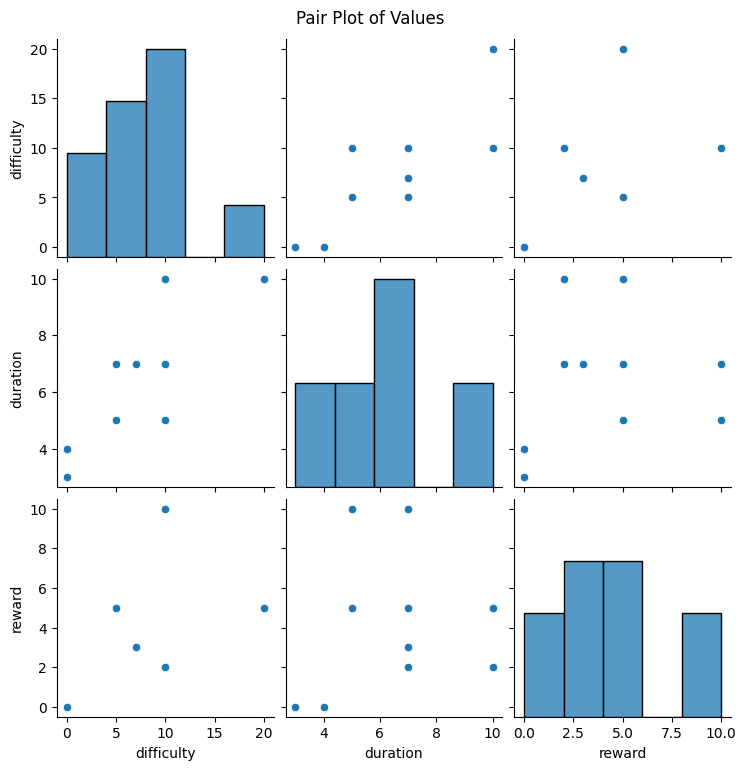

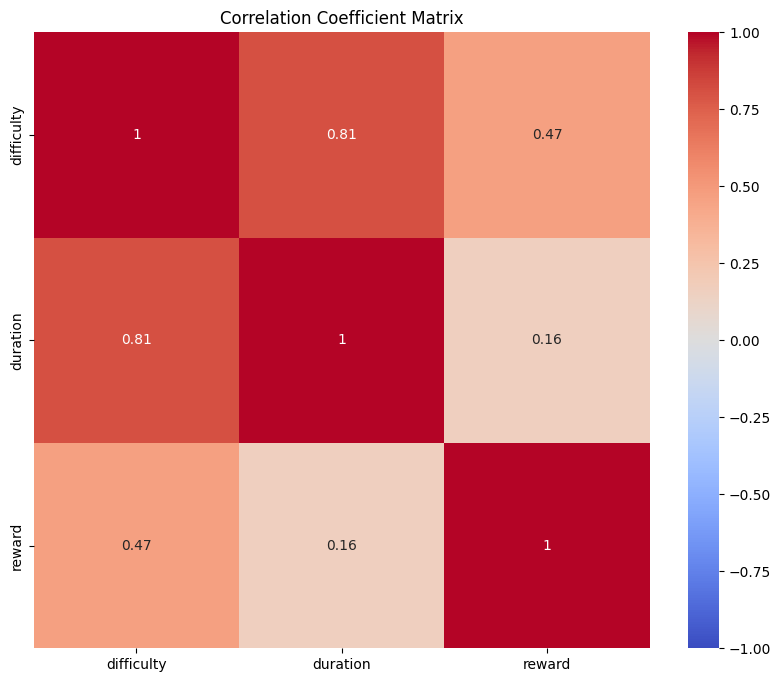

In [15]:
explore_quantitive_variables(portfolio, ["difficulty","duration","reward"])

### Profile

#### Qualitative Analysis

In [16]:
grouped_size = profile.groupby('gender').size().reset_index(name='Count')
print(grouped_size)

  gender  Count
0      F   6129
1      M   8484
2      O    212


In [17]:
new_profile = profile
new_profile["gender"] = new_profile["gender"].replace(0,"NA")

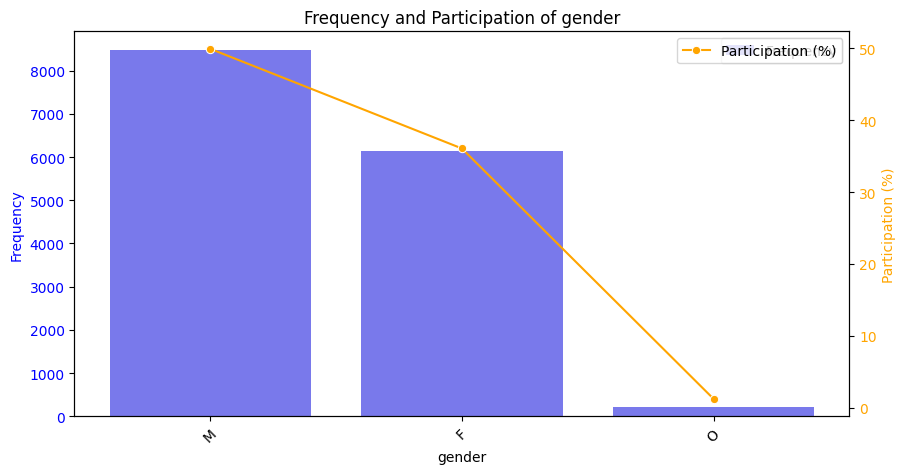

In [18]:
explore_qualitative_variables(new_profile, ["gender"])

#### Quantitative Analysis

                age         income
count  17000.000000   17000.000000
mean      62.531412   57037.000000
std       26.738580   29734.044501
min       18.000000       0.000000
25%       45.000000   40000.000000
50%       58.000000   59000.000000
75%       73.000000   76000.000000
max      118.000000  120000.000000


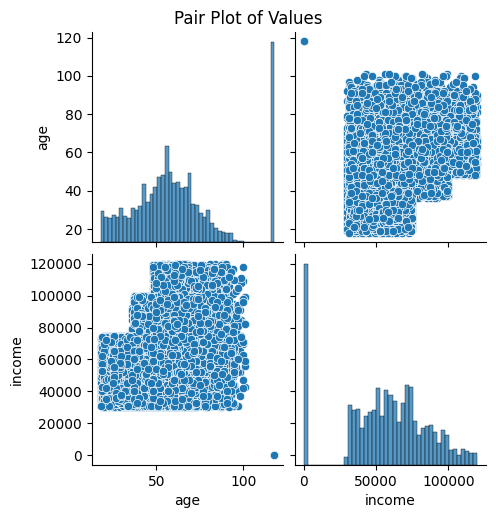

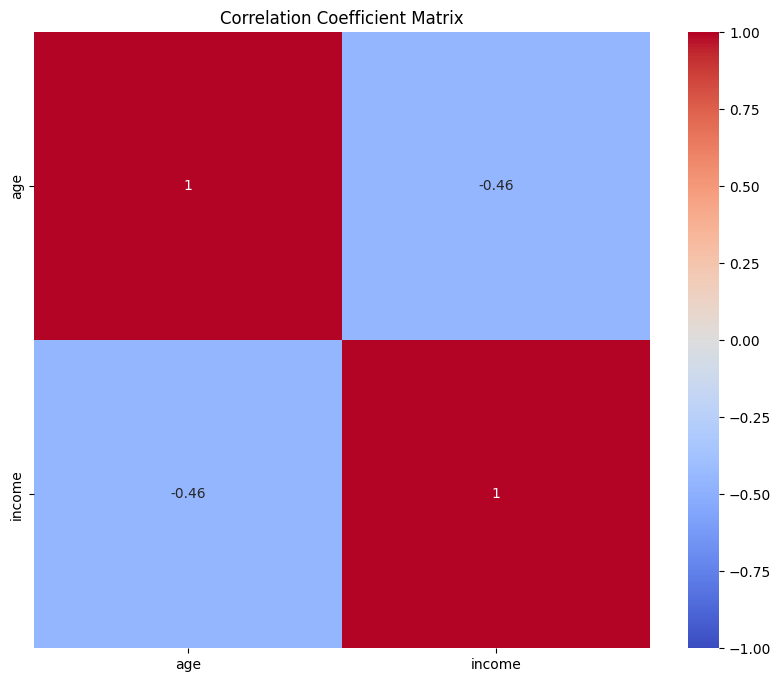

In [19]:
explore_quantitive_variables(profile.fillna(0), ["age","income"])

### Transcript

#### Qualitative Analysis

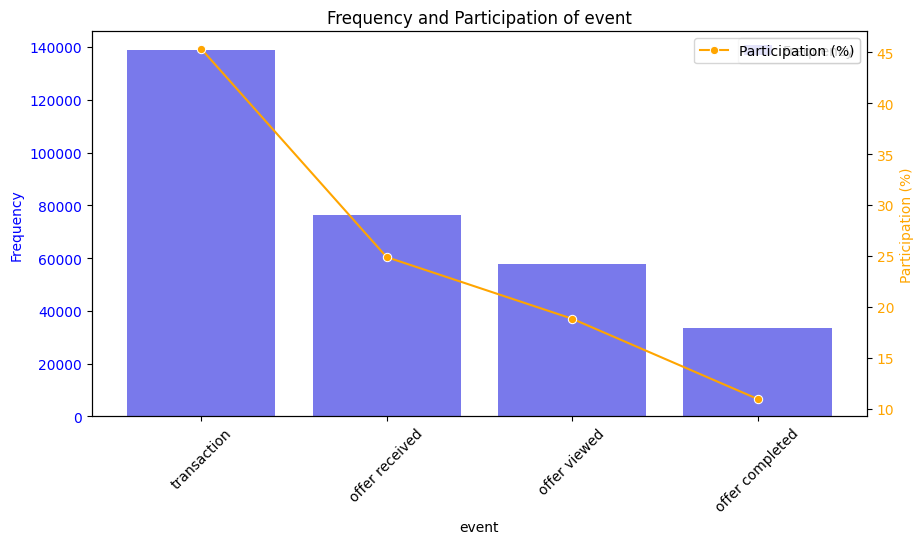

In [20]:
explore_qualitative_variables(transcript, ["event"])

#### Quantitative Analysis

In [21]:
transcript.fillna(0).describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [22]:
result_df = transcript.groupby(["event","person"])['value'].count().reset_index()
result_df.head()

,event,person,value
0,offer completed,0009655768c64bdeb2e877511632db8f,3
1,offer completed,0011e0d4e6b944f998e987f904e8c1e5,3
2,offer completed,0020c2b971eb4e9188eac86d93036a77,3
3,offer completed,0020ccbbb6d84e358d3414a3ff76cffd,3
4,offer completed,003d66b6608740288d6cc97a6903f4f0,3


In [23]:
pivoted_df = pd.pivot_table(result_df, values='value', index='person', columns='event', aggfunc='sum', fill_value=0)
pivoted_df = pivoted_df.reset_index()
pivoted_df.head()

event,person,offer completed,offer received,offer viewed,transaction
0,0009655768c64bdeb2e877511632db8f,3,5,4,8
1,00116118485d4dfda04fdbaba9a87b5c,0,2,2,3
2,0011e0d4e6b944f998e987f904e8c1e5,3,5,5,5
3,0020c2b971eb4e9188eac86d93036a77,3,5,3,8
4,0020ccbbb6d84e358d3414a3ff76cffd,3,4,4,12


event  offer completed  offer received  offer viewed   transaction
count     17000.000000    17000.000000  17000.000000  17000.000000
mean          1.975235        4.486882      3.395588      8.173706
std           1.605563        1.076165      1.297653      5.116250
min           0.000000        0.000000      0.000000      0.000000
25%           1.000000        4.000000      2.750000      4.000000
50%           2.000000        5.000000      3.000000      7.000000
75%           3.000000        5.000000      4.000000     11.000000
max           6.000000        6.000000      6.000000     36.000000


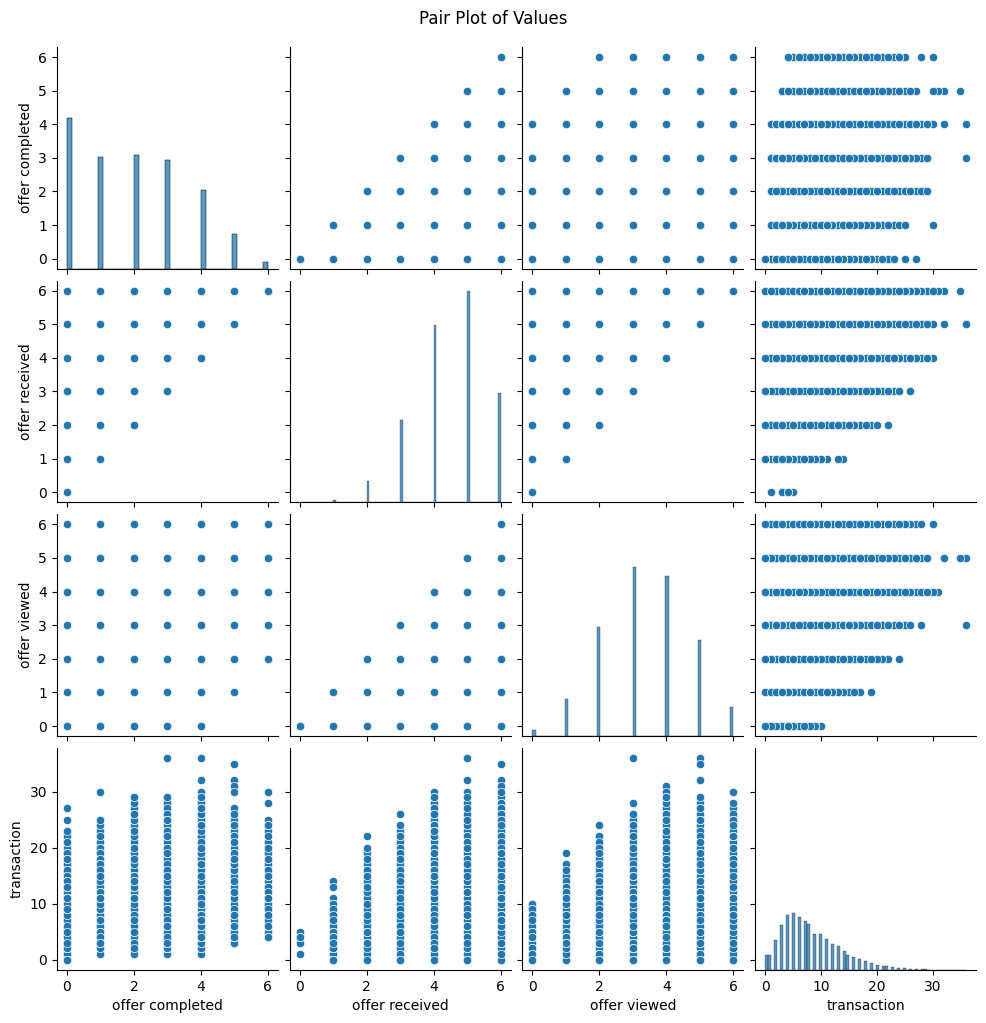

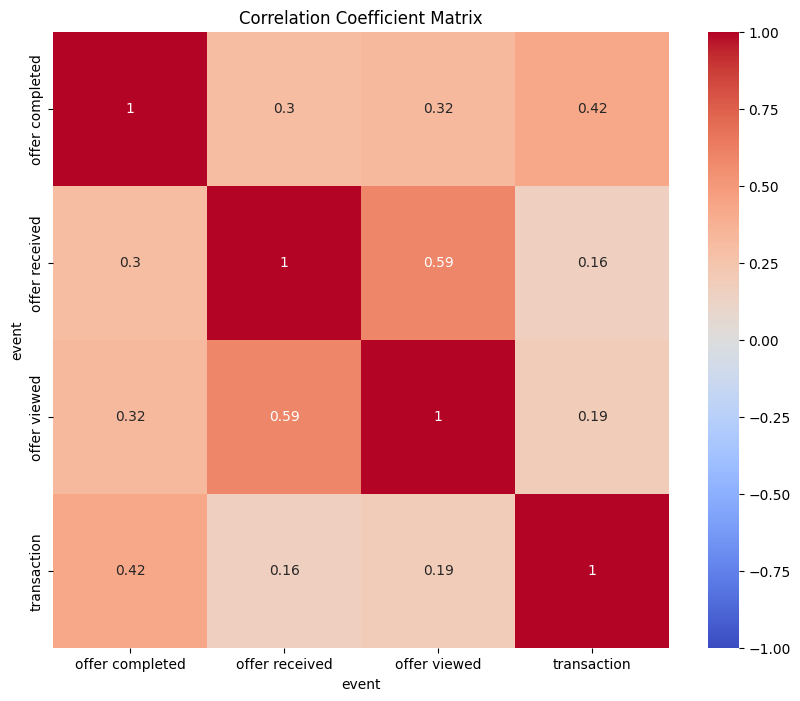

In [24]:
explore_quantitive_variables(pivoted_df, ["offer completed","offer received","offer viewed","transaction"])